## Importing the libiraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import time 
import matplotlib.pyplot as plt
import math
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report
from tensorflow.keras import datasets, layers,models


## Splitting the dataset into the Training set and Test set

In [4]:
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()

## Normalize pixel values to range [0, 1]


In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Define a shallow network


In [8]:
from keras.layers import Input  # Import Input function

# Define the model
model = models.Sequential([
    Input(shape=(32, 32, 3)),               # Input layer specifying input shape
    layers.Flatten(),                      # Flatten the input image
    layers.Dense(512, activation='relu'),  # Single hidden layer with 512 neurons
    layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

## Compile the model with Step Decay:



In [10]:
# Step decay function
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.96
    epochs_drop = 4.0
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lrate

# LearningRateScheduler callback
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam()  # Default learning rate will be overridden by the callback
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


##  Train the model


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2693 - loss: 2.2082 - val_accuracy: 0.3687 - val_loss: 1.7786 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3764 - loss: 1.7455 - val_accuracy: 0.3942 - val_loss: 1.7137 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4072 - loss: 1.6618 - val_accuracy: 0.3924 - val_loss: 1.7166 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4223 - loss: 1.6203 - val_accuracy: 0.4069 - val_loss: 1.6623 - learning_rate: 9.6000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4386 - loss: 1.5766 - val_accuracy: 0.4320 - val_loss: 1.5979 - learning_rate: 9.6000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4448 - loss: 1.5513 - val_accuracy: 0.4339 - val_loss: 1.5966 - learning_rate: 9.6000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4592

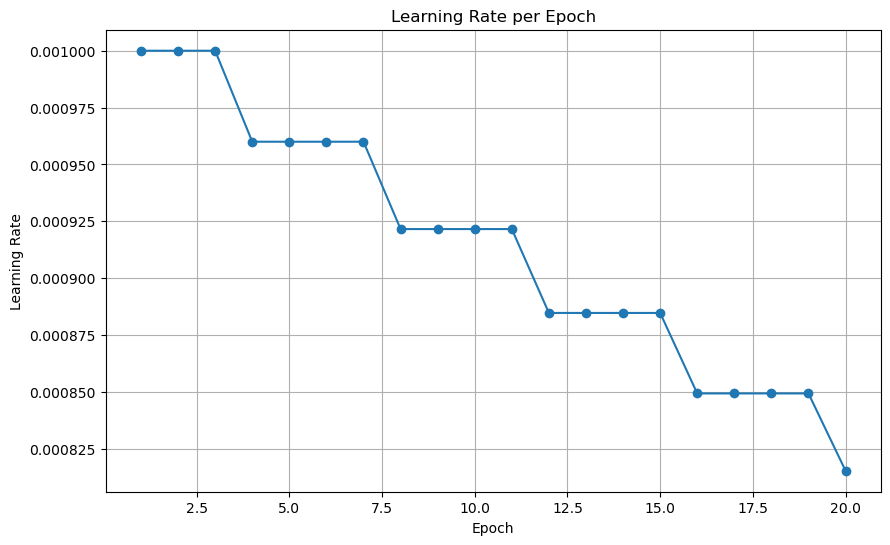

In [12]:
# Define a custom callback to record the learning rate at each epoch
class LrLogger(Callback):
    def __init__(self):
        super().__init__()
        self.lr_history = []

    def on_epoch_end(self, epoch, logs=None):
        # Append the current learning rate to the history
        lr = self.model.optimizer.learning_rate.numpy()
        self.lr_history.append(lr)

# Initialize the learning rate logger
lr_logger = LrLogger()

# Train the model with the custom callback
start_time = time.time()
history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=64, 
    validation_split=0.2,
    callbacks=[lrate, lr_logger]  # Include step decay and logging
)
end_time = time.time()
training_time = end_time - start_time

print(f"\nTotal Training Time: {training_time:.2f} seconds")

# Visualize the learning rate after training
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(lr_logger.lr_history) + 1), lr_logger.lr_history, marker='o')
plt.title("Learning Rate per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid()
plt.show()


## Plot the learning rate history


## Making the classification Report

In [15]:

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

print("classification Report:  \n",classification_report(y_test,y_pred_classes))
print("Step decay Accuracy:  \n",accuracy_score(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
classification Report:  
               precision    recall  f1-score   support

           0       0.62      0.41      0.49      1000
           1       0.67      0.49      0.57      1000
           2       0.29      0.56      0.38      1000
           3       0.38      0.22      0.28      1000
           4       0.50      0.28      0.36      1000
           5       0.38      0.45      0.41      1000
           6       0.59      0.40      0.48      1000
           7       0.51      0.60      0.55      1000
           8       0.52      0.71      0.60      1000
           9       0.54      0.59      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000

Step decay Accuracy:  
 0.4713


## Visualize Training History (Accuracy and Loss)


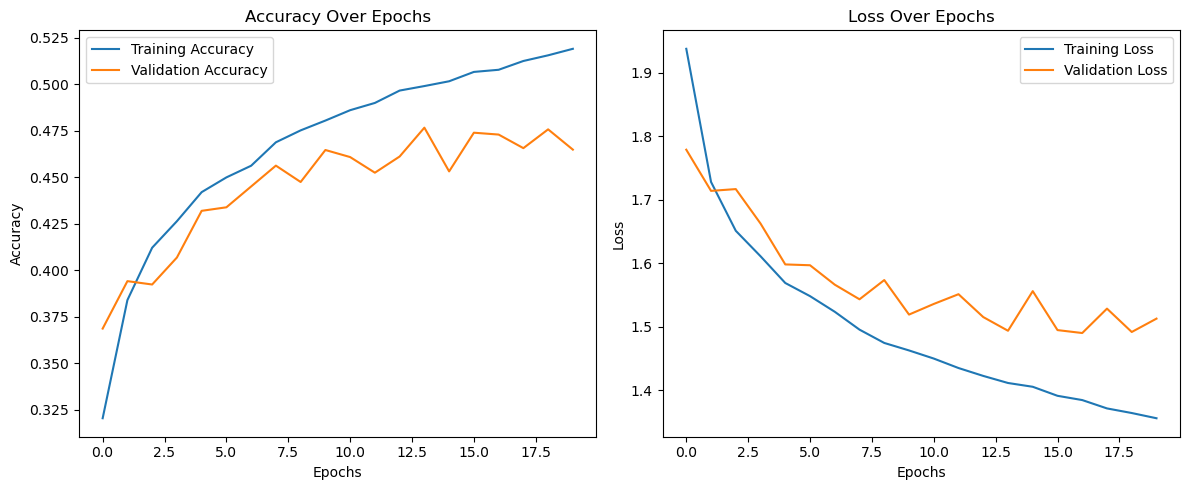

In [17]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Confusion Matrix Visualization

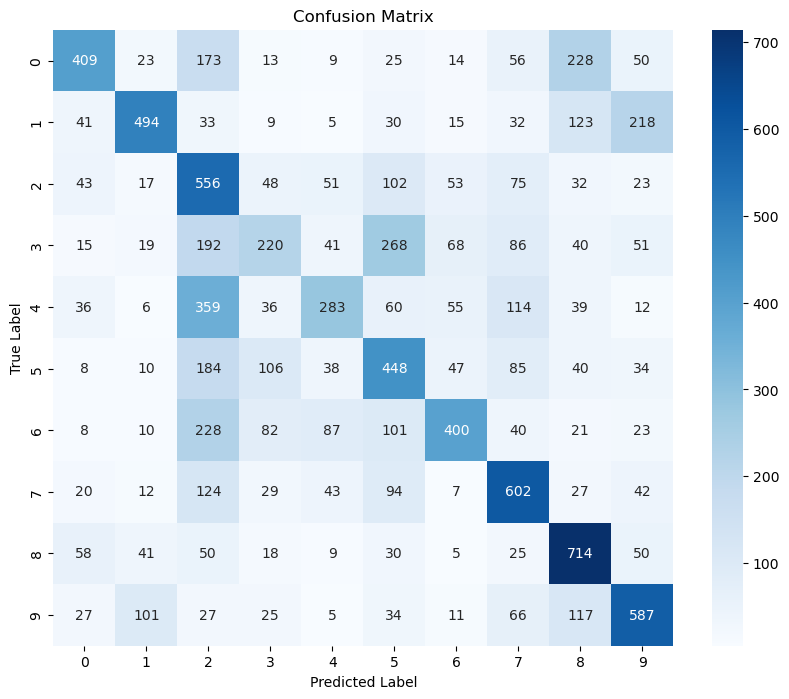

In [19]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

